In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from datetime import datetime, timedelta

end = datetime.today().date()
start="2012-01-01"
stock="AAPL"

data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3324 entries, 2012-01-03 to 2025-03-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3324 non-null   float64
 1   (High, AAPL)    3324 non-null   float64
 2   (Low, AAPL)     3324 non-null   float64
 3   (Open, AAPL)    3324 non-null   float64
 4   (Volume, AAPL)  3324 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 155.8 KB


In [4]:
df = data[['Close', 'High','Low']]

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.,
        20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

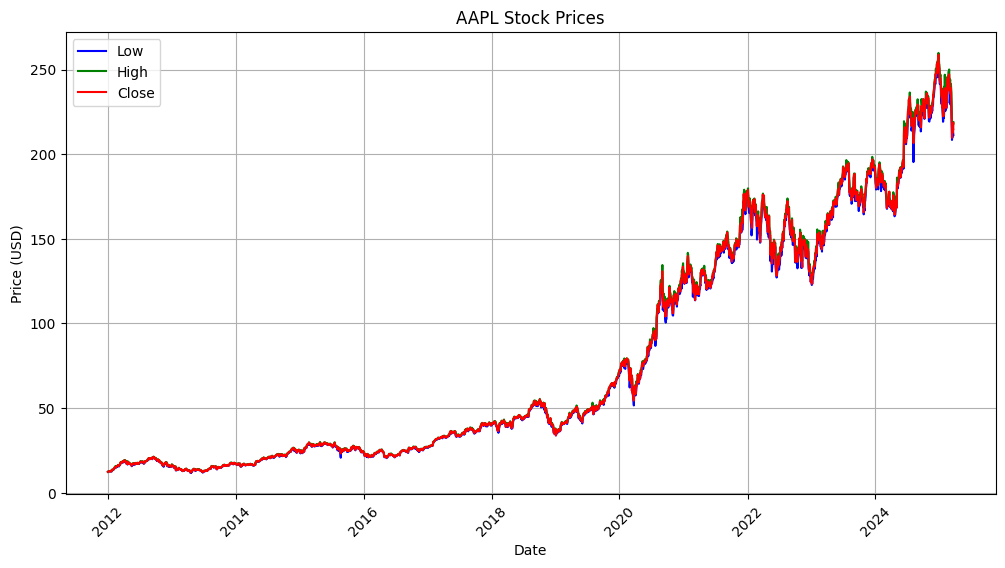

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Low'], label='Low', color='blue')
plt.plot(data.index, data['High'], label='High', color='green')
plt.plot(data.index, data['Close'], label='Close', color='red')

plt.title(f"{stock} Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)  


(array([20158., 20160., 20162., 20164., 20166., 20168.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

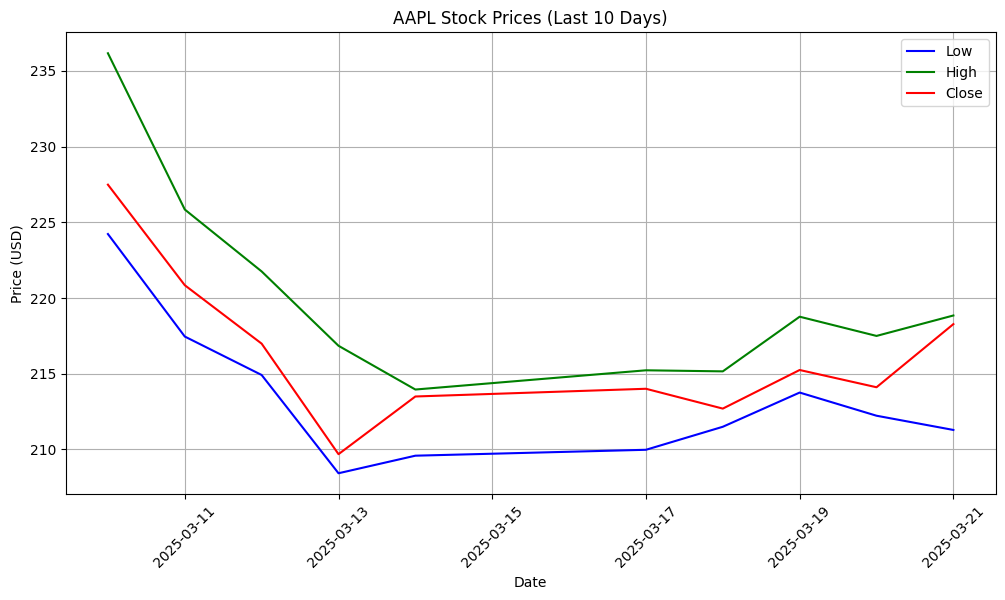

In [6]:
last_10 = data.tail(10)

plt.figure(figsize=(12, 6))
plt.plot(last_10.index, last_10['Low'], label='Low', color='blue')
plt.plot(last_10.index, last_10['High'], label='High', color='green')
plt.plot(last_10.index, last_10['Close'], label='Close', color='red')

plt.title(f"{stock} Stock Prices (Last 10 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3324 entries, 2012-01-03 to 2025-03-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3324 non-null   float64
 1   (High, AAPL)    3324 non-null   float64
 2   (Low, AAPL)     3324 non-null   float64
 3   (Open, AAPL)    3324 non-null   float64
 4   (Volume, AAPL)  3324 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 155.8 KB


In [8]:
df=pd.DataFrame(data)

In [9]:
df=df.drop(['Volume','Open'],axis=1)

In [10]:
df

Price            Close        High         Low
Ticker            AAPL        AAPL        AAPL
Date                                          
2012-01-03   12.375390   12.413609   12.308282
2012-01-04   12.441898   12.479215   12.316709
2012-01-05   12.580028   12.595676   12.418725
2012-01-06   12.711536   12.722069   12.615839
2012-01-09   12.691375   12.872538   12.679939
...                ...         ...         ...
2025-03-17  214.000000  215.220001  209.970001
2025-03-18  212.690002  215.149994  211.490005
2025-03-19  215.240005  218.759995  213.750000
2025-03-20  214.100006  217.490005  212.220001
2025-03-21  218.270004  218.839996  211.279999

[3324 rows x 3 columns]

In [11]:
train_size=len(df['Close'])*0.80
test_size=len(df['Close'])-train_size

In [12]:
train_size

2659.2000000000003

In [13]:
test_size

664.7999999999997

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [18]:
df=pd.DataFrame(df)
train_data = df.iloc[0:int(train_size), :]  
test_data = df.iloc[int(train_size):, :] 

In [21]:
train_data

[array([[0.00269217, 0.00125728, 0.00333688],
        [0.00309053, 0.00164875, 0.00338818],
        [0.00391788, 0.00234365, 0.00400917],
        [0.00470557, 0.00309783, 0.00520904],
        [0.00458481, 0.00399567, 0.00559922],
        [0.00485699, 0.00368142, 0.0056267 ],
        [0.00473261, 0.00311579, 0.00522552],
        [0.00452351, 0.00312476, 0.00512293],
        [0.00423872, 0.00268483, 0.00510645],
        [0.00512015, 0.00367962, 0.00589414],
        [0.00591506, 0.00430451, 0.00650599],
        [0.00566991, 0.00464568, 0.00654445],
        [0.00432704, 0.00395077, 0.00530612],
        [0.00560862, 0.00412135, 0.00577324],
        [0.00434689, 0.00351983, 0.00526951],
        [0.00907847, 0.00879007, 0.00969892],
        [0.00871256, 0.00777373, 0.00959084],
        [0.0091902 , 0.00771804, 0.00970622],
        [0.01022305, 0.0086913 , 0.01000299],
        [0.01084852, 0.00947061, 0.01140985],
        [0.01079626, 0.0096053 , 0.01186417],
        [0.01060338, 0.00927848, 0

In [19]:
test_data

0         1         2
2656  0.562403  0.567781  0.563189
2657  0.557012  0.560020  0.557250
2658  0.577736  0.576895  0.562708
2659  0.579972  0.578129  0.571737
2660  0.600576  0.601970  0.592162
...        ...       ...       ...
3316  0.830819  0.846274  0.827202
3317  0.801241  0.826444  0.800775
3318  0.816679  0.814773  0.805498
3319  0.818745  0.819902  0.807086
3320  0.813437  0.819619  0.813276

[665 rows x 3 columns]

In [22]:
def create_dataset(dataset, time_step=100):
    dataset = np.array(dataset)  
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, :])  
    return np.array(dataX), np.array(dataY)


In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train

array([[[0.0018211 , 0.00085096, 0.00223212],
        [0.00209057, 0.00111591, 0.00226643],
        [0.00265023, 0.00158625, 0.00268183],
        ...,
        [0.01959124, 0.02046436, 0.01982603],
        [0.02124829, 0.02033313, 0.01990571],
        [0.02060937, 0.0207828 , 0.02088599]],

       [[0.00209057, 0.00111591, 0.00226643],
        [0.00265023, 0.00158625, 0.00268183],
        [0.00318308, 0.00209671, 0.00348446],
        ...,
        [0.02124829, 0.02033313, 0.01990571],
        [0.02060937, 0.0207828 , 0.02088599],
        [0.02023988, 0.01948841, 0.02054775]],

       [[0.00265023, 0.00158625, 0.00268183],
        [0.00318308, 0.00209671, 0.00348446],
        [0.00310137, 0.00270437, 0.00374545],
        ...,
        [0.02060937, 0.0207828 , 0.02088599],
        [0.02023988, 0.01948841, 0.02054775],
        [0.02145674, 0.02047892, 0.02138591]],

       ...,

       [[0.58989503, 0.61102917, 0.59222473],
        [0.60054059, 0.59791439, 0.56117086],
        [0.60895337, 0

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 3)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 3)

In [24]:
X_train

array([[[0.0018211 , 0.00085096, 0.00223212],
        [0.00209057, 0.00111591, 0.00226643],
        [0.00265023, 0.00158625, 0.00268183],
        ...,
        [0.01959124, 0.02046436, 0.01982603],
        [0.02124829, 0.02033313, 0.01990571],
        [0.02060937, 0.0207828 , 0.02088599]],

       [[0.00209057, 0.00111591, 0.00226643],
        [0.00265023, 0.00158625, 0.00268183],
        [0.00318308, 0.00209671, 0.00348446],
        ...,
        [0.02124829, 0.02033313, 0.01990571],
        [0.02060937, 0.0207828 , 0.02088599],
        [0.02023988, 0.01948841, 0.02054775]],

       [[0.00265023, 0.00158625, 0.00268183],
        [0.00318308, 0.00209671, 0.00348446],
        [0.00310137, 0.00270437, 0.00374545],
        ...,
        [0.02060937, 0.0207828 , 0.02088599],
        [0.02023988, 0.01948841, 0.02054775],
        [0.02145674, 0.02047892, 0.02138591]],

       ...,

       [[0.58989503, 0.61102917, 0.59222473],
        [0.60054059, 0.59791439, 0.56117086],
        [0.60895337, 0

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,3)))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
print(X_train.shape)  
print(y_train.shape)  


(2555, 100, 3)
(2555, 3)


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          41600     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 152,353
Trainable params: 152,353
Non-trainable params: 0
__________________________________________________

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
80/80 [==============================] - 15s 151ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 2/100
80/80 [==============================] - 11s 141ms/step - loss: 3.4313e-04 - val_loss: 0.0026
Epoch 3/100
80/80 [==============================] - 11s 134ms/step - loss: 3.5889e-04 - val_loss: 0.0042
Epoch 4/100
80/80 [==============================] - 11s 136ms/step - loss: 3.2741e-04 - val_loss: 0.0067
Epoch 5/100
80/80 [==============================] - 11s 136ms/step - loss: 3.1806e-04 - val_loss: 0.0038
Epoch 6/100
80/80 [==============================] - 11s 137ms/step - loss: 2.7938e-04 - val_loss: 0.0041
Epoch 7/100
80/80 [==============================] - 11s 137ms/step - loss: 2.3357e-04 - val_loss: 0.0036
Epoch 8/100
80/80 [==============================] - 11s 138ms/step - loss: 2.7593e-04 - val_loss: 0.0024
Epoch 9/100
80/80 [==============================] - 12s 148ms/step - loss: 2.3743e-04 - val_loss: 0.0036
Epoch 10/100
80/80 [==============================

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

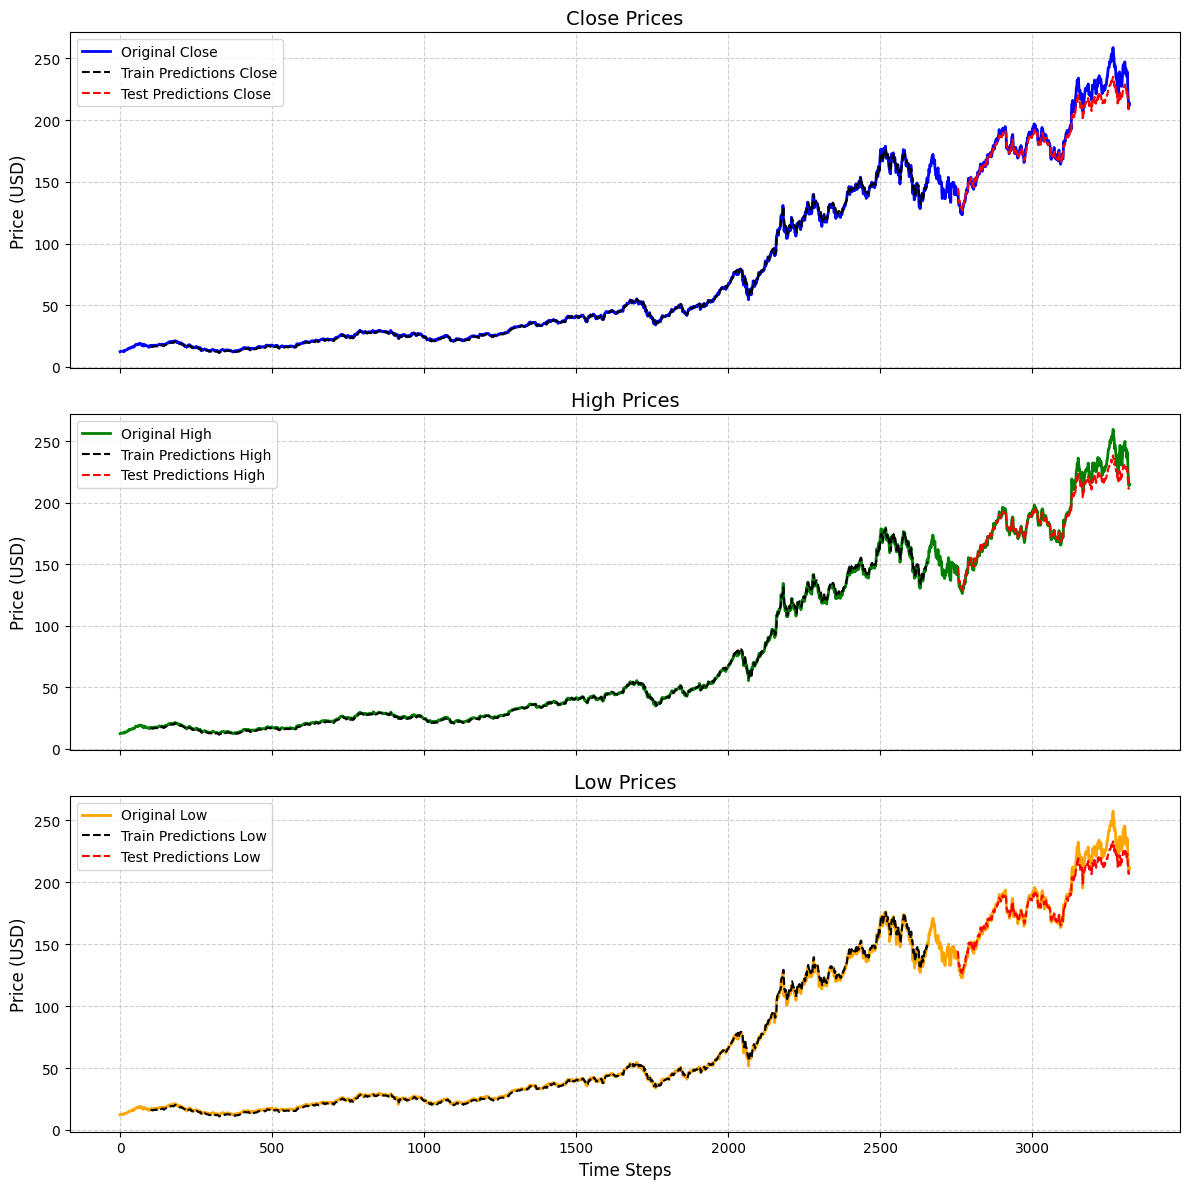

In [31]:
df_original = scaler.inverse_transform(df)  

trainPredictPlot = np.empty_like(df_original)
trainPredictPlot[:, :] = np.nan  
trainPredictPlot[time_step:time_step + len(train_predict), :] = train_predict  

testPredictPlot = np.empty_like(df_original)
testPredictPlot[:, :] = np.nan  

start_idx = len(train_predict) + (time_step * 2)
end_idx = start_idx + len(test_predict)  
testPredictPlot[start_idx:end_idx, :] = test_predict  

fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

labels = ["Close", "High", "Low"]
colors = ["blue", "green", "orange"]

    axs[i].plot(df_original[:, i], label=f"Original {labels[i]}", color=colors[i], linewidth=2)
    axs[i].plot(trainPredictPlot[:, i], label=f"Train Predictions {labels[i]}", color="black", linestyle="--", linewidth=1.5)
    axs[i].plot(testPredictPlot[:, i], label=f"Test Predictions {labels[i]}", color="red", linestyle="--", linewidth=1.5)
    
    axs[i].set_title(f"{labels[i]} Prices", fontsize=14)
    axs[i].set_ylabel("Price (USD)", fontsize=12)
    axs[i].legend(fontsize=10)
    axs[i].grid(True, linestyle="--", alpha=0.6)

axs[-1].set_xlabel("Time Steps", fontsize=12)

plt.tight_layout()
plt.show()

In [32]:
model.save("Stocks2_new.h5")

In [33]:
from PIL import Image
import numpy as np

img = Image.open("Stocks2.png")

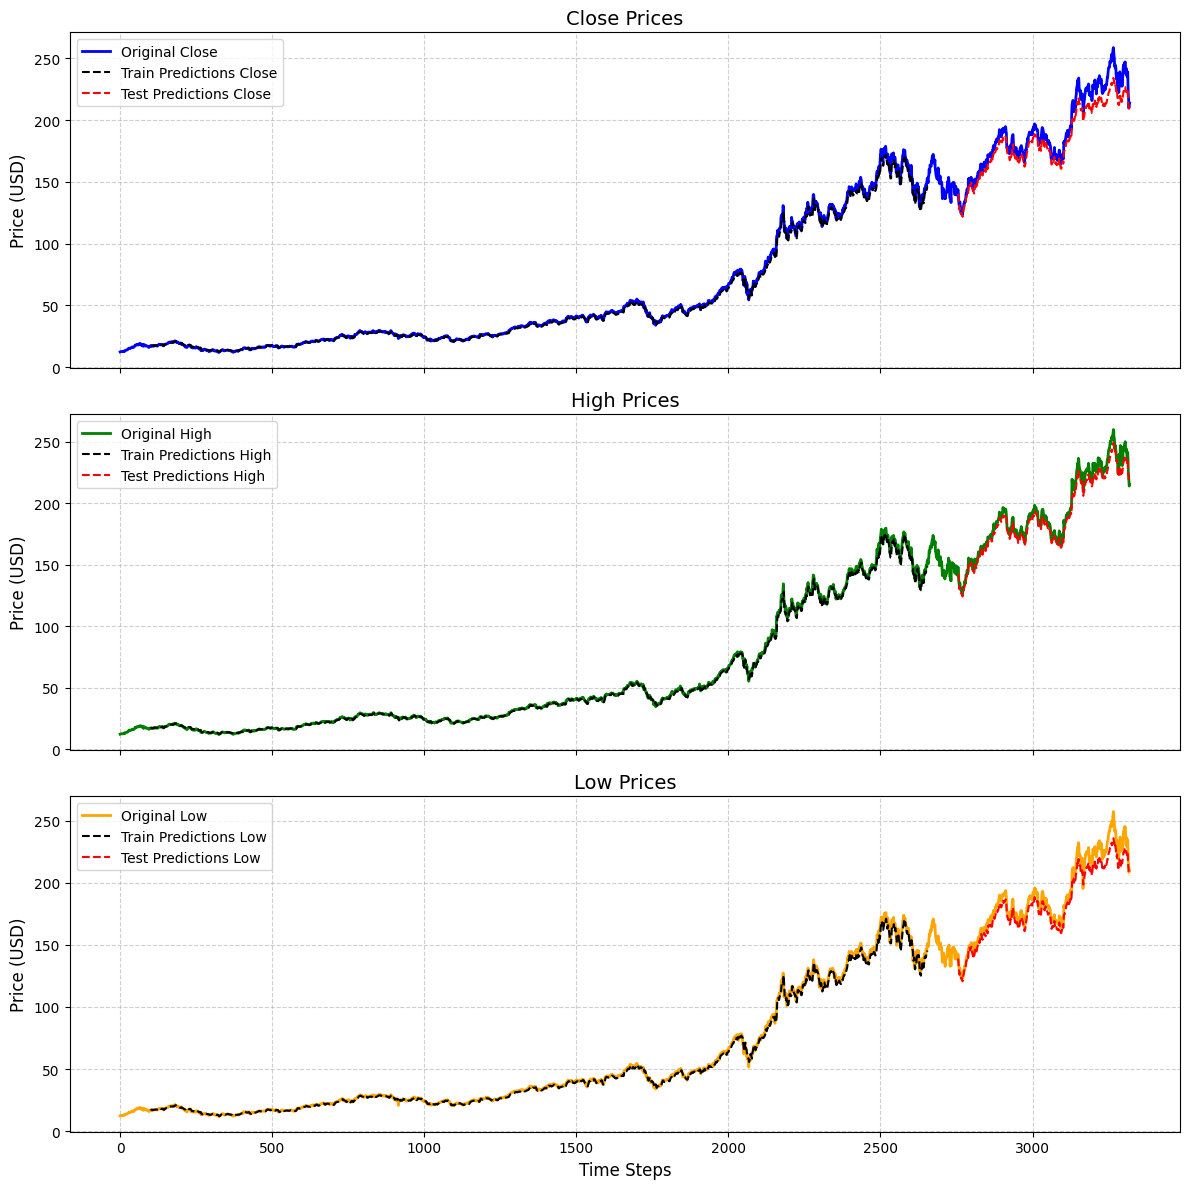

In [34]:
img

In [39]:
from tensorflow.keras.models import load_model

model = load_model("Stocks2_new.h5")


In [36]:
import tensorflow as tf
print(tf.__version__)  


2.6.0


In [37]:
import h5py

model_path = "Stocks2.h5"
with h5py.File(model_path, "r") as f:
    print(f.attrs["keras_version"])  
    print(f.attrs["backend"])  


3.8.0
tensorflow


In [38]:
import h5py

model_path = "Stocks2.h5"
with h5py.File(model_path, "r") as f:
    print(f.attrs["keras_version"])  
    print(f.attrs["backend"])  


3.8.0
tensorflow


In [77]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_stock_data(ticker, time_step=300):

    stock_data = yf.download(ticker, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
    stock_data = stock_data[["Open", "High", "Low", "Close"]]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)
 
    df_scaled = pd.DataFrame(scaled_data, columns=stock_data.columns, index=stock_data.index)

    X_data = []
    for i in range(len(df_scaled) - time_step):
        X_data.append(df_scaled.iloc[i : i + time_step].values.flatten()) 

    X_data = np.array(X_data)
    
    return X_data, scaler  

new_company = "MSFT" 
X_new, scaler = preprocess_stock_data(new_company)


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


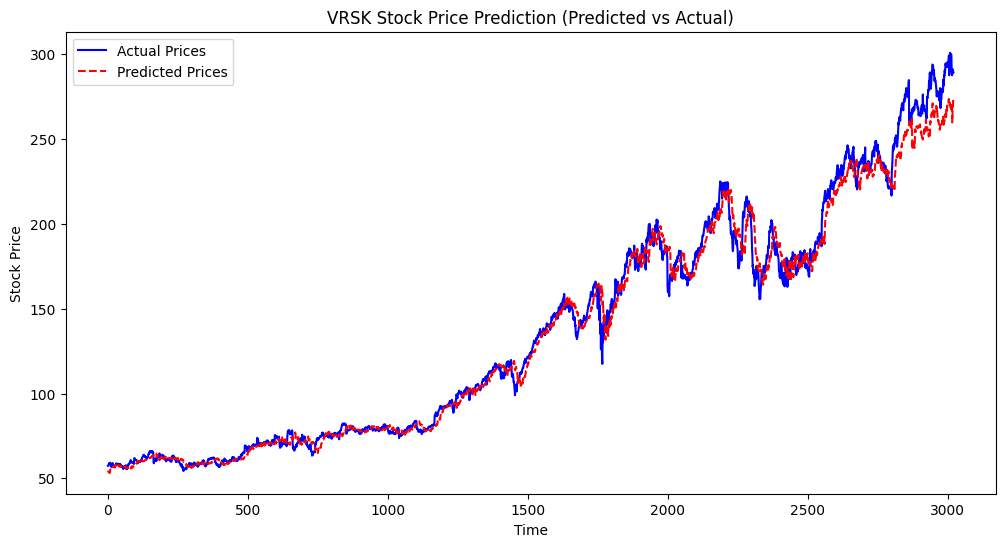

In [69]:
import matplotlib.pyplot as plt

# Get actual closing prices (last len(predicted_prices) days)
stock_data = yf.download(new_company, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
actual_prices = stock_data["Close"].values[-len(predicted_prices):]  # Match length of predictions

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predicted_prices[:, -1], label="Predicted Prices", color="red", linestyle="dashed")  # Predicted Close prices
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} Stock Price Prediction (Predicted vs Actual)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


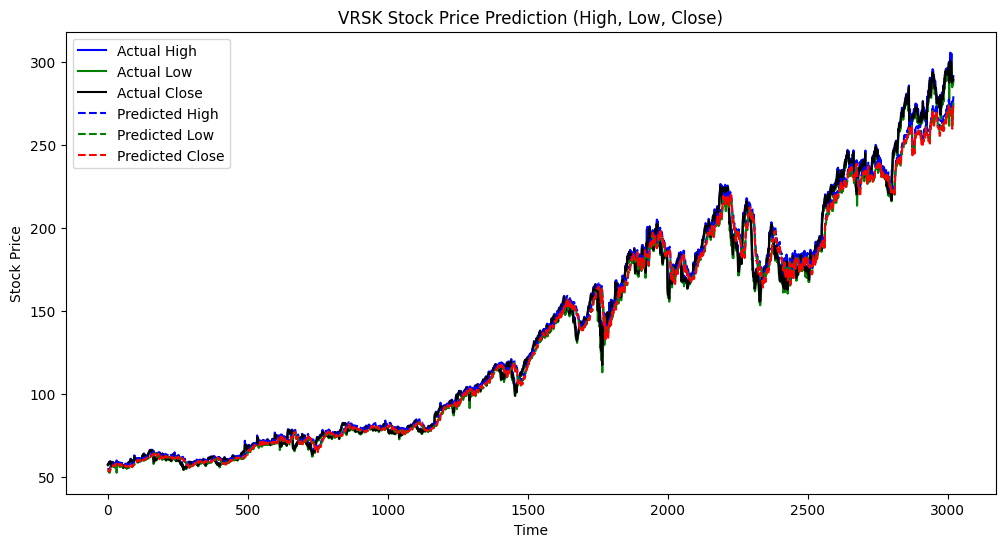

In [70]:
import matplotlib.pyplot as plt

stock_data = yf.download(new_company, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
actual_prices = stock_data[["High", "Low", "Close"]].values[-len(predicted_prices):]  

plt.figure(figsize=(12, 6))
plt.plot(actual_prices[:, 0], label="Actual High", color="blue")
plt.plot(actual_prices[:, 1], label="Actual Low", color="green")
plt.plot(actual_prices[:, 2], label="Actual Close", color="black")

plt.plot(predicted_prices[:, 0], label="Predicted High", color="blue", linestyle="dashed")
plt.plot(predicted_prices[:, 1], label="Predicted Low", color="green", linestyle="dashed")
plt.plot(predicted_prices[:, 2], label="Predicted Close", color="red", linestyle="dashed")

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} Stock Price Prediction (High, Low, Close)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


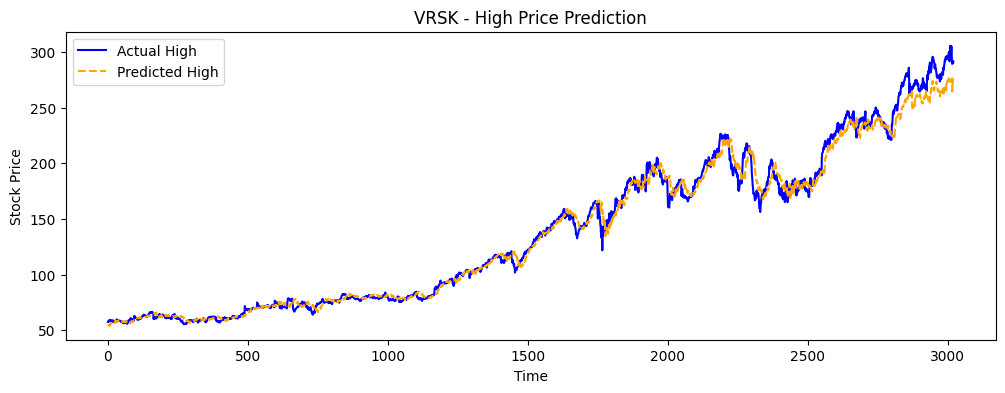

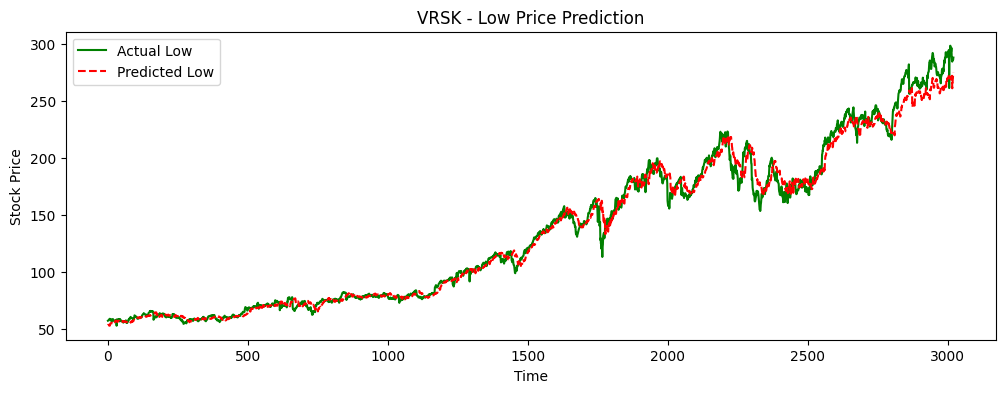

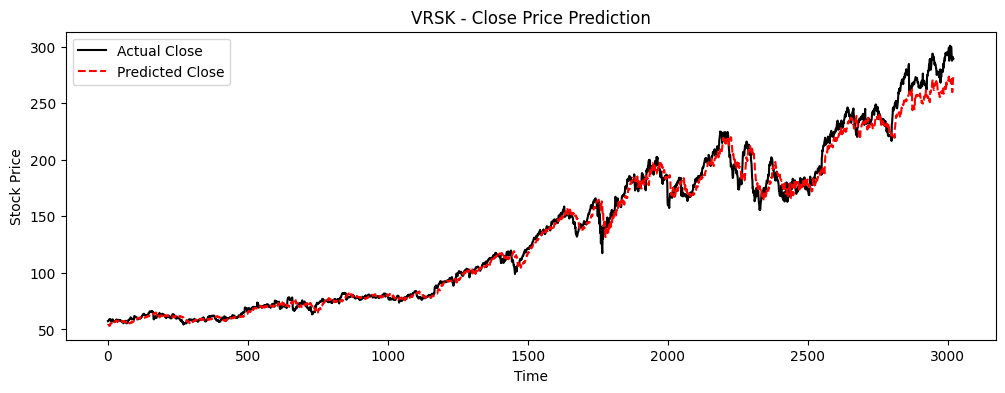

In [71]:
import matplotlib.pyplot as plt

# Get actual prices for the last len(predicted_prices) days
stock_data = yf.download(new_company, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
actual_prices = stock_data[["High", "Low", "Close"]].values[-len(predicted_prices):]  # Match length of predictions

# Plot High Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 0], label="Actual High", color="blue")
plt.plot(predicted_prices[:, 0], label="Predicted High", color="orange", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - High Price Prediction")
plt.legend()
plt.show()

# Plot Low Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 1], label="Actual Low", color="green")
plt.plot(predicted_prices[:, 1], label="Predicted Low", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Low Price Prediction")
plt.legend()
plt.show()

# Plot Close Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 2], label="Actual Close", color="black")
plt.plot(predicted_prices[:, 2], label="Predicted Close", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Close Price Prediction")
plt.legend()
plt.show()


In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_stock_data(ticker, time_step=300):
    # Download stock data
    stock_data = yf.download(ticker, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
    stock_data = stock_data[["Open", "High", "Low", "Close"]]
    
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)
    
    # Convert to DataFrame
    df_scaled = pd.DataFrame(scaled_data, columns=stock_data.columns, index=stock_data.index)

    # Create sequences
    X_data = []
    for i in range(len(df_scaled) - time_step):
        X_data.append(df_scaled.iloc[i : i + time_step].values.flatten())  # Flatten to match model input

    X_data = np.array(X_data)
    
    return X_data, scaler  # Returning scaler for inverse transformation later

# Load new company's data
new_company = "TSLA"  # Change this to any stock ticker
X_new, scaler = preprocess_stock_data(new_company)


[*********************100%***********************]  1 of 1 completed


In [74]:
# Check the shape before reshaping
print("Before reshaping:", X_new.shape)  # Should be (samples, features)

# Calculate the correct number of features per timestep
original_feature_count = X_new.shape[1] // 30  # Total features divided by time steps

print(f"Calculated original feature count per timestep: {original_feature_count}")

# Ensure the shape aligns properly
X_new = X_new.reshape((X_new.shape[0], 30, original_feature_count))

# Extract High, Low, Close (assuming feature order is [Open, High, Low, Close])
X_new = X_new[:, :, 1:4]  # Indices 1, 2, 3 correspond to High, Low, Close

# Check the shape after fixing
print("Final X_new shape:", X_new.shape)  # Should be (samples, 30, 3)

# Predict
predictions = model.predict(X_new)

# Inverse transform predictions to original scale
dummy_col = np.zeros((predictions.shape[0], 1))  # Dummy column for inverse transform
predicted_prices = scaler.inverse_transform(np.hstack((dummy_col, predictions)))[:, 1:]

# Print sample predictions
print(predicted_prices[:5])  # Display first 5 predictions


Before reshaping: (3022, 1200)
Calculated original feature count per timestep: 40
Final X_new shape: (3022, 30, 3)
[[2.75378456 1.83212832 1.52643054]
 [2.76302506 1.84056593 1.53403059]
 [2.81805826 1.89115596 1.588628  ]
 [2.85474102 1.9248079  1.62491222]
 [2.79586909 1.86992517 1.5668792 ]]


[*********************100%***********************]  1 of 1 completed


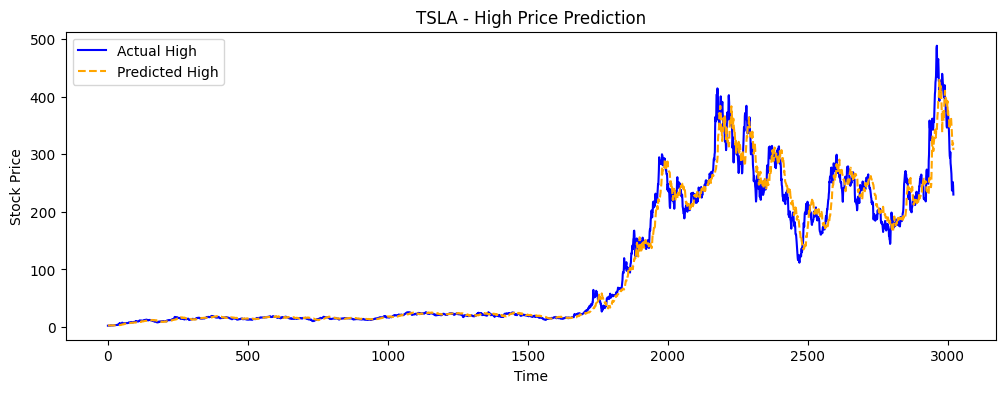

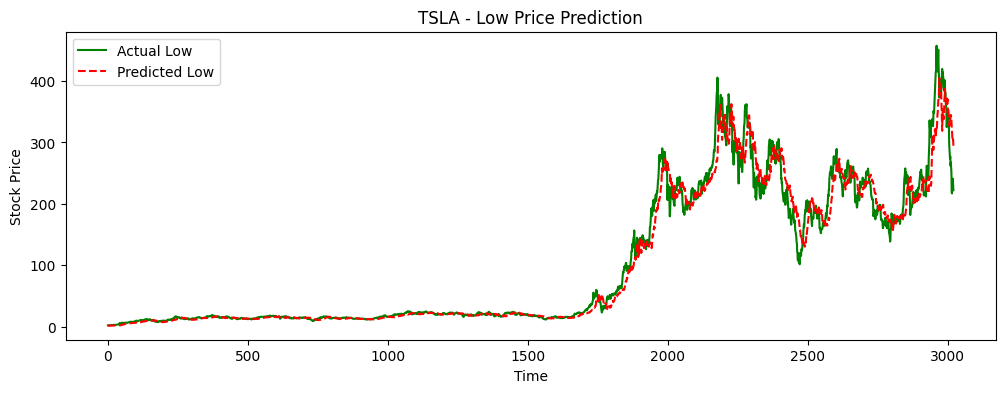

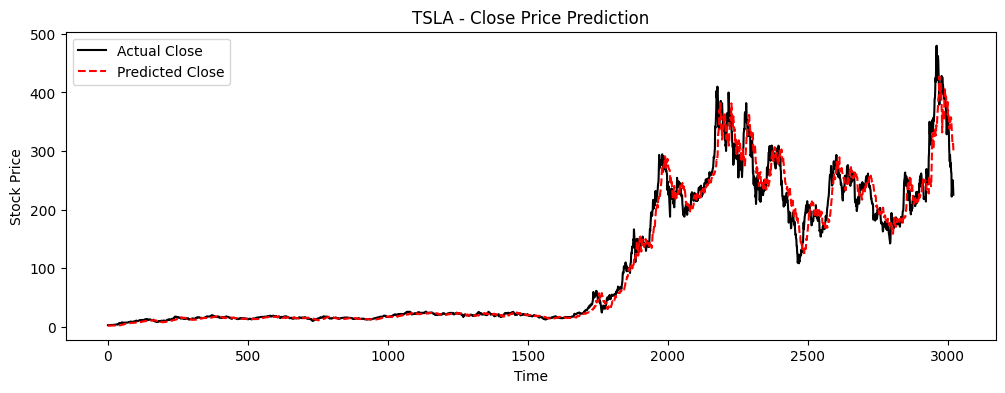

In [53]:
import matplotlib.pyplot as plt

# Get actual prices for the last len(predicted_prices) days
stock_data = yf.download(new_company, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
actual_prices = stock_data[["High", "Low", "Close"]].values[-len(predicted_prices):]  # Match length of predictions

# Plot High Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 0], label="Actual High", color="blue")
plt.plot(predicted_prices[:, 0], label="Predicted High", color="orange", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - High Price Prediction")
plt.legend()
plt.show()

# Plot Low Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 1], label="Actual Low", color="green")
plt.plot(predicted_prices[:, 1], label="Predicted Low", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Low Price Prediction")
plt.legend()
plt.show()

# Plot Close Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 2], label="Actual Close", color="black")
plt.plot(predicted_prices[:, 2], label="Predicted Close", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Close Price Prediction")
plt.legend()
plt.show()


In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_stock_data(ticker, time_step=300):
    # Download stock data
    stock_data = yf.download(ticker, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
    stock_data = stock_data[["Open", "High", "Low", "Close"]]
    
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)
    
    # Convert to DataFrame
    df_scaled = pd.DataFrame(scaled_data, columns=stock_data.columns, index=stock_data.index)

    # Create sequences
    X_data = []
    for i in range(len(df_scaled) - time_step):
        X_data.append(df_scaled.iloc[i : i + time_step].values.flatten())  # Flatten to match model input

    X_data = np.array(X_data)
    
    return X_data, scaler  # Returning scaler for inverse transformation later

# Load new company's data
new_company = "VRSK"  # Change this to any stock ticker
X_new, scaler = preprocess_stock_data(new_company)


[*********************100%***********************]  1 of 1 completed


In [55]:
# Check the shape before reshaping
print("Before reshaping:", X_new.shape)  # Should be (samples, features)

# Calculate the correct number of features per timestep
original_feature_count = X_new.shape[1] // 30  # Total features divided by time steps

print(f"Calculated original feature count per timestep: {original_feature_count}")

# Ensure the shape aligns properly
X_new = X_new.reshape((X_new.shape[0], 30, original_feature_count))

# Extract High, Low, Close (assuming feature order is [Open, High, Low, Close])
X_new = X_new[:, :, 1:4]  # Indices 1, 2, 3 correspond to High, Low, Close

# Check the shape after fixing
print("Final X_new shape:", X_new.shape)  # Should be (samples, 30, 3)

# Predict
predictions = model.predict(X_new)

# Inverse transform predictions to original scale
dummy_col = np.zeros((predictions.shape[0], 1))  # Dummy column for inverse transform
predicted_prices = scaler.inverse_transform(np.hstack((dummy_col, predictions)))[:, 1:]

# Print sample predictions
print(predicted_prices[:5])  # Display first 5 predictions


Before reshaping: (3021, 1200)
Calculated original feature count per timestep: 40
Final X_new shape: (3021, 30, 3)
[[54.5140532  52.95299495 53.65852315]
 [54.88627616 53.31844297 54.03420363]
 [54.74539398 53.19148833 53.89086362]
 [54.70494972 53.16106433 53.85400857]
 [54.20125596 52.67661401 53.34301597]]


[*********************100%***********************]  1 of 1 completed


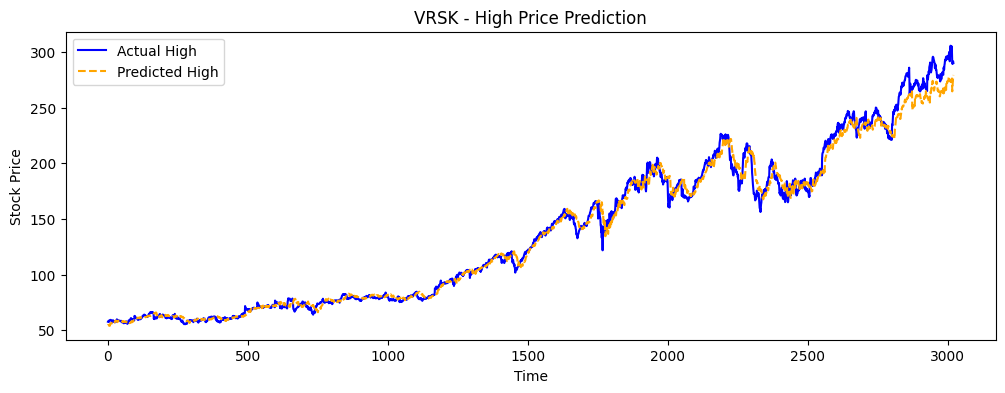

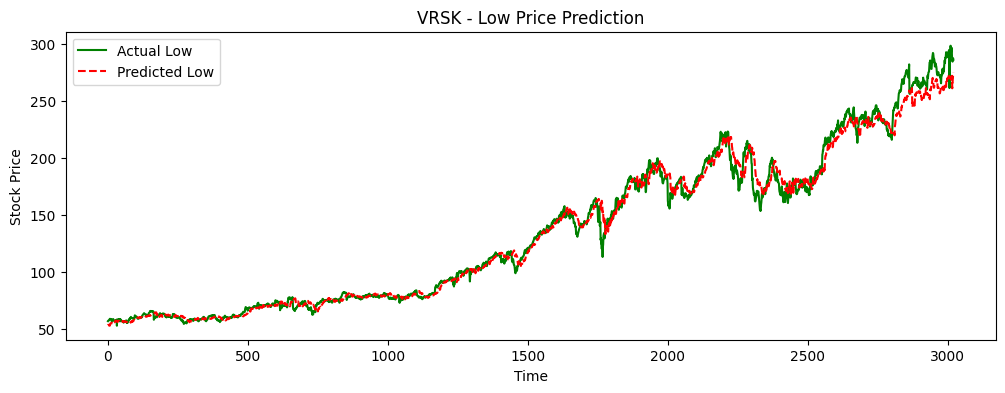

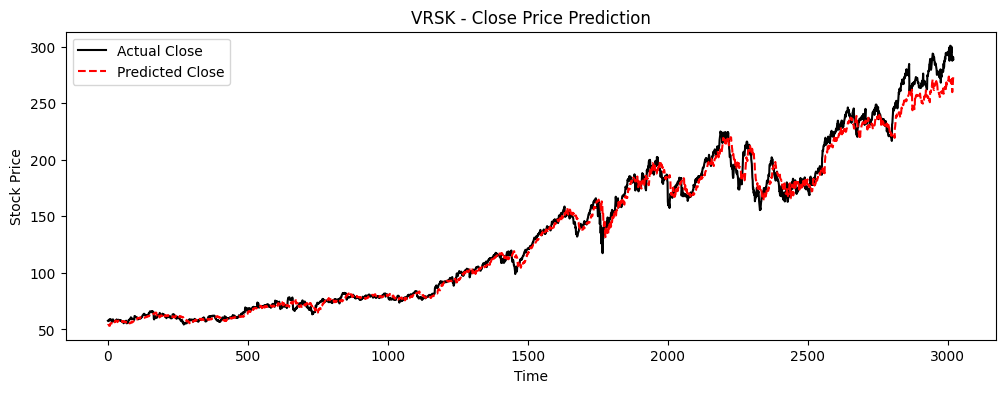

In [56]:
import matplotlib.pyplot as plt

# Get actual prices for the last len(predicted_prices) days
stock_data = yf.download(new_company, start="2012-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"))
actual_prices = stock_data[["High", "Low", "Close"]].values[-len(predicted_prices):]  # Match length of predictions

# Plot High Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 0], label="Actual High", color="blue")
plt.plot(predicted_prices[:, 0], label="Predicted High", color="orange", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - High Price Prediction")
plt.legend()
plt.show()

# Plot Low Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 1], label="Actual Low", color="green")
plt.plot(predicted_prices[:, 1], label="Predicted Low", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Low Price Prediction")
plt.legend()
plt.show()

# Plot Close Prices
plt.figure(figsize=(12, 4))
plt.plot(actual_prices[:, 2], label="Actual Close", color="black")
plt.plot(predicted_prices[:, 2], label="Predicted Close", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{new_company} - Close Price Prediction")
plt.legend()
plt.show()


In [2]:
from tensorflow.keras.models import load_model
import numpy as np
model = load_model("Stocks2_new.h5")

test_input = np.random.rand(1, 100, 3)  
output = model.predict(test_input)
print(output.shape)

(1, 3)
